# ViralCutter
Uma alternativa gratuita ao `opus.pro` e ao `vidyo.ai`

## ⚠️Você está na versão <b>SIMPLIFICADA</b>, se quiser mais modificações para o texto, entre na versão completa no link abaixo.
https://colab.research.google.com/drive/1UZKzeqjIeEyvq9nPx7s_4mU6xlkZQn_R?usp=sharing#scrollTo=6Q-ljfsw1unE

# Suporte em:
[ ![](https://dcbadge.vercel.app/api/server/aihubbrasil) ](https://discord.gg/aihubbrasil)

In [ ]:
#@title Áudio Mudo
%%html
<audio src="https://oobabooga.github.io/silence.m4a" controls>

In [ ]:
#@title Dependência
from IPython.display import clear_output
!git clone https://github.com/RafaelGodoyEbert/ViralCutter.git
!pip install -U g4f[all] -q
!pip install yt_dlp -q
!pip install ffmpeg-python -q
!pip install git+https://github.com/m-bain/whisperx.git -q
!pip install mediapipe -q
%cd /content/ViralCutter
clear_output()
print("Finalizado...")

Finalizado...


In [ ]:
#@title Configuração (Antes de executar, configure)
import os
from scripts import download_video, transcribe_video, create_viral_segments, cut_segments, edit_video, transcribe_cuts, adjust_subtitles, burn_subtitles, save_json
from IPython.display import clear_output

# Create necessary directories
os.makedirs('tmp', exist_ok=True)
os.makedirs('final', exist_ok=True)
os.makedirs('subs', exist_ok=True)
os.makedirs('subs_ass', exist_ok=True)
os.makedirs('burned_sub', exist_ok=True)

# Cores originais invertidas
vermelho = "0A08E4"
amarelo = "00FFFF"
azul = "700206"
preto = "000000"
verde = "58DA7D"
branco = "FFFFFF"
laranja = "0099FE"
roxo = "800080"
rosa = "C77DF9"
ciano = "FFFF00"
marrom = "2D4A8C"
cinza = "808080"
verde_limao = "32CD32"
azul_claro = "E6D8AD"
verde = "0FF00"

#@ Se quiser pular apenas para a parte de refazer a edição as legendas, ative-o
# Burn subtitles option
burn_only = False #@{type:"boolean"}

#@ ---
#@markdown <h1><center>🎬 <b>Configurações do Vídeo</b> 🎬</center></h1>

#@markdown ---
#@markdown <h4>🔗 Link do vídeo no YouTube</h4>
url = 'https://youtu.be/1ZnwqFh3CrA?si=zpSig52k11NY7que'  # @param {type: "string"}
#@ ---
#@markdown <h4>📊 Quantidade de cortes</h4>
num_segments = 3  # @param {type:"number"}
#@ ---
#@ <h4>🌟 Modo viral</h4>
viral_mode = True #@{type:"boolean"}
#@ ---
#@ <h4>🔤 Legendas queimadas</h4>
burn_subtitles_option = True # @ ["False", "True"] {type:"raw"}
#@ ---
#@ <h4>🎨 Tema personalizado (caso não use modo viral)</h4>
themes = '' # @ {type:"string", placeholder:"Se `viral_mode` desmarcado, coloque o tema aqui, se mais que um, separado por virgulas"}
#@ ---
#@ <h4>🧠 Modelo para análise de vídeo</h4>
model = 'large-v3' # @ ['base', 'large-v3']

#@markdown <br>
#@markdown <h1><center>⏳ <b>Configurações de Tempo</b> ⏳</center></h1>

#@markdown ---
#@markdown <h4>⌛ Tempo mínimo (segundos)</h4>
tempo_minimo = 15 #@param{type: "number"}
#@ ---
#@markdown <h4>⏳ Tempo máximo (segundos)</h4>
tempo_maximo = 90 #@param{type: "number"}

#@markdown <br>
#@markdown <h1><center>💬 <b>Configurações de Legendas</b> 💬</center></h1>
# <h4>⚠️ Só mexa se ``burn_subtitles_option`` estiver ativo!</h4>

#@markdown ---
#@ ### Fonte da legenda
fonte = "Arial" #@{type: "string"}
#@ ---
#@ ### Tamanho da fonte
base_size = 12 #@{type: "number"}
#@ ---
#@ ### Cor da fonte
base_color_c = "FFFFFF" #@{type: "string"}
#@ ---
#@ ### Transparência da fonte (00= opaco, 80= 50% transparente, FF= totalmente transparente)
base_color_t = "00" #@{type: "string"}
base_color = f"&H{base_color_t}" + base_color_c + "&"

#@ ---
#@ ### Cor do contorno
contorno_c = "808080" #@{type: "string"}
#@ ---
#@ ### Transparência da fonte (00= opaco, 80= 50% transparente, FF= totalmente transparente)
contorno_t = "00" #@{type: "string"}
contorno = f"&H{contorno_t}" + contorno_c + "&"

#@ ---
#@ ### Tamanho do highlight
h_size = 14 #@{type: "number"}

#@ ---
#@ ### Número de palavras por bloco
palavras_por_bloco = 5 #@{type: "number"}

#@ ---
#@ ### Limite de gap entre falas (em segundos)
limite_gap = 0.5 #@{type: "number"}

#@ ---
#@markdown ### Modo de exibição das legendas (highlight é palavra em destaque)
modo = 'highlight' # @param ['highlight', 'sem_higlight', 'palavra_por_palavra']

#@ ---
#@ <h3><b><center>🎨 Configurações do Destaque</center></b></h4>

#@ ---
#@ ### Cor da fonte de destaque
highlight_color_c = "0FF00" #@{type: "string"}
#@ ---
#@ ### Transparência da fonte de destaque (00= opaco, 80= 50% transparente, FF= totalmente transparente)
highlight_color_t = "00" #@{type: "string"}
highlight_color = f"&H{highlight_color_t}" + highlight_color_c + "&"

#@ ---
#@ ### Posição vertical da legenda (1=170, 2=130, 3=99, 4=60 (default), 5=20)
posicao_vertical = 60 #@{type: "number"}

#@ ---
#@ ### Cor da sombra
cor_da_sombra_c = "000000" #@{type: "string"}
#@ ---
#@ ### Transparência da fonte (00= opaco, 80= 50% transparente, FF= totalmente transparente)
cor_da_sombra_t = "00" #@{type: "string"}
cor_da_sombra = f"&H{cor_da_sombra_t}" + cor_da_sombra_c + "&"

#@ ---
#@ ### Alinhamento do texto
#@ 1 = Esquerda, 2 = Centro (default), 3 = Direita
alinhamento = 2 #@{type: "slider", min: 1, max: 3}

#@ ---
#@ ### Efeitos no texto
negrito = 0 #@{type: "number"}
italico = 0 #@{type: "number"}
sublinhado = 0 #@{type: "number"}
tachado = 0 #@{type: "number"}

#@ ---
#@markdown ### Estilo da borda | 1 = Contorno, 3 = Caixa
#@
estilo_da_borda = 1 #@param {type: "number"}

#@ ---
#@ ### Espessura do contorno
espessura_do_contorno = 1.5 #@{type: "number"}

#@ ---
#@ ### Tamanho da sombra
tamanho_da_sombra = 10 #@{type: "number"}

if burn_only:
    print("Burn only mode activated. Skipping to subtitle burning...")
    burn_subtitles.burn()
    print("Subtitle burning completed.")
else:
    # Execute the pipeline
    input_video = download_video.download(url)
    srt_file, tsv_file = transcribe_video.transcribe(input_video, model)
    clear_output()
    viral_segments = create_viral_segments.create(num_segments, viral_mode, themes, tempo_minimo, tempo_maximo)
    save_json.save_viral_segments(viral_segments)

    cut_segments.cut(viral_segments)
    edit_video.edit()

    if burn_subtitles_option:
        import subprocess
        def transcribe():
            def generate_whisperx(input_file, output_folder, model=model):
                output_file = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(input_file))[0]}.srt")
                json_file = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(input_file))[0]}.json")  # Define the JSON output file

                # Skip processing if the JSON file already exists
                if os.path.exists(json_file):
                    print(f"Arquivo já existe, pulando: {json_file}")
                    return

                command = f"""
                    whisperx {input_file} \
                    --model {model} \
                    --task transcribe \
                    --align_model WAV2VEC2_ASR_LARGE_LV60K_960H \
                    --chunk_size 10 \
                    --vad_onset 0.4 \
                    --vad_offset 0.3 \
                    --compute_type float32 \
                    --batch_size 10 \
                    --output_dir {output_folder} \
                    --output_format srt \
                    --output_format json \
                """

                print(f"Transcrevendo: {input_file}...")
                result = subprocess.run(command, shell=True, text=True, capture_output=True)
                print(f"Comando executado: {command}")

                if result.returncode != 0:
                    print("Erro durante a transcrição:")
                    print(result.stderr)
                else:
                    print(f"Transcrição concluída. Arquivo salvo em: {output_file} e {json_file}")
                    print(result.stdout)  # Verificar a saída correta

            # Define o diretório de entrada e o diretório de saída
            input_folder = '/content/ViralCutter/final'
            output_folder = '/content/ViralCutter/subs'

            # Itera sobre todos os arquivos na pasta de entrada
            for filename in os.listdir(input_folder):
                if filename.endswith('.mp4'):  # Filtra apenas arquivos .mp4
                    input_file = os.path.join(input_folder, filename)
                    generate_whisperx(input_file, output_folder)

        transcribe()
        adjust_subtitles.adjust(base_color, base_size, h_size, highlight_color, palavras_por_bloco, limite_gap, modo, posicao_vertical, alinhamento, fonte, contorno, cor_da_sombra, negrito, italico, sublinhado, tachado, estilo_da_borda, espessura_do_contorno, tamanho_da_sombra)
        burn_subtitles.burn()  # Queimar legendas
    else:
        print("Subtitle burning skipped.")

    print("Process completed successfully!")

Exemplo de resposta<br>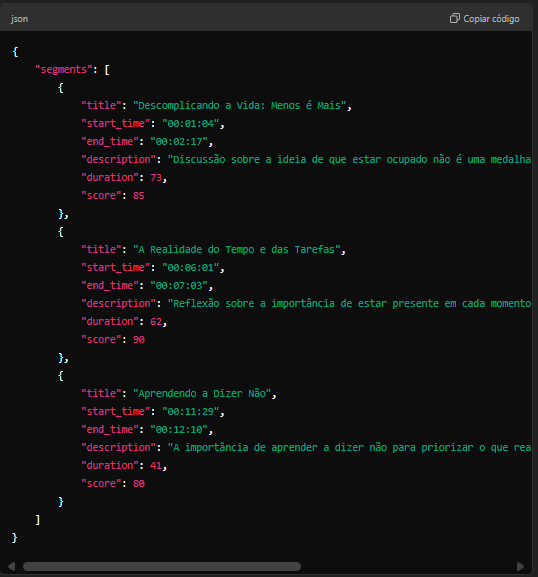

In [ ]:
#@title Virais criado
#@markdown Irá imprimir ``Segmento 0:``, cada número representa um vídeo para colocar na célula posterior.
import json

# Lê o conteúdo do arquivo viral_segments.txt
with open('/content/ViralCutter/tmp/viral_segments.txt', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Itera sobre os segmentos e imprime as informações desejadas
for index, segment in enumerate(data['segments']):
    title = segment['title']
    description = segment['description']
    score = segment['score']
    print(f"Segmento {index}:")
    print(f"  Título: {title}")
    print(f"  Descrição: {description}")
    print(f"  Score: {score}")
    print()


Segmento 0:
  Título: Descomplicando a Vida: Menos é Mais
  Descrição: Discussão sobre a ideia de que estar ocupado não é uma medalha de honra e que ter tempo é um verdadeiro indicador de sucesso.
  Score: 85

Segmento 1:
  Título: A Realidade do Tempo e das Tarefas
  Descrição: Reflexão sobre a importância de estar presente em cada momento e não se deixar levar pela pressão de fazer tudo ao mesmo tempo.
  Score: 90

Segmento 2:
  Título: Aprendendo a Dizer Não
  Descrição: A importância de aprender a dizer não para priorizar o que realmente importa na vida, destacando o respeito próprio.
  Score: 80



# Resultado em vídeo

In [ ]:
#@title Resultado em vídeo
#@markdown <h1><b> Escolha o número do vídeo
from IPython.display import HTML
from base64 import b64encode
import json

numero_do_video = 1 #@param {type:"number"}
tipo_de_video = "Legendas queimadas" # ["Legendas queimadas", "Video limpo"]

if tipo_de_video == "Legendas queimadas":
  pasta_video = 'burned_sub'
  sufix = 'processed_subtitled' #final-output000_
else:
  pasta_video = 'final'
  sufix = 'processed'

def show_video(video_path, video_width=400):
    video_file = open(video_path, "r+b").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

# Load segment information from the text file
with open('/content/ViralCutter/tmp/viral_segments.txt', 'r') as file:
    segments_data = json.load(file)

# Função para exibir o vídeo e as informações correspondentes ao índice
def display_video_with_segment(index):
    try:
        segment = segments_data['segments'][index]

        # Print Title, Description, and Score of the segment
        print(f"Título: {segment['title']}")
        print(f"Descrição: {segment['description']}")
        print(f"Score: {segment['score']}")
        print()

        # Input video
        video_path = f'/content/ViralCutter/{pasta_video}/final-output{str(index).zfill(3)}_{sufix}.mp4'
        return show_video(video_path)

    except IndexError:
        print(f"Segmento não encontrado para o índice {index}")
        return None

# Exibir vídeo e informações do segmento correspondente ao índice 0 (por exemplo)
display_video_with_segment(numero_do_video)  # Substitua o índice conforme necessário


# BAIXAR EM ZIP

In [ ]:
#@title Baixar somente Cortes com <u>resolução original 💻
#@markdown Logo vai baixar os vídeos que são somente os cortes, sem a edição e foco no rosto
import os
import zipfile

# Definir o diretório onde os vídeos estão localizados
directory = '/content/ViralCutter/tmp'
zip_filename = '/content/ViralCutter/videos_original_scale.zip'

# Criar um arquivo zip
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Iterar sobre os arquivos no diretório
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('_original_scale.mp4'):
                # Adicionar o arquivo ao zip
                zipf.write(os.path.join(root, file), arcname=file)

# Fazer o download do arquivo zip
from google.colab import files
files.download(zip_filename)


In [ ]:
#@title Baixar todos os virais gerados <b><u>(com legendas queimadas)

!zip -r /content/burned_sub.zip /content/ViralCutter/burned_sub
from google.colab import files
files.download("/content/burned_sub.zip")


# ⚠️⚠️⚠️LIMPAR TUDO E COMEÇAR DE NOVO⚠️⚠️⚠️

In [ ]:
#@title Apagar vídeo queimado pra gerar um novo
# prompt: apagar pasta /content/burned_sub

!rm -rf /content/ViralCutter/burned_sub


In [ ]:
#@title Limpar pastas
#@markdown <h1><b>ATENÇÃO: Ao executar essa célula, tudo será apagado e você deve recomeçar na célula onde coloca o <u>LINK</u> do youtube
# prompt: Apagar pasta /content/tmp

!rm -rf /content/ViralCutter/tmp
!rm -rf /content/ViralCutter/final
!rm -rf /content/ViralCutter/subs_ass
!rm -rf /content/ViralCutter/burned_sub
!rm -rf /content/ViralCutter/subs



#Créditos

Inspirado no [reels clips automator](https://github.com/eddieoz/reels-clips-automator) e no [YoutubeVideoToAIPoweredShorts](https://github.com/Fitsbit/YoutubeVideoToAIPoweredShorts)<br>

---
![Rafa.png](https://i.imgur.com/cGknQpU.png;base64)

Desenvolvido por **Rafa.Godoy**<br>
[ ![GitHub](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white) ](https://github.com/rafaelGodoyEbert)<br>
[ ![X](https://img.shields.io/twitter/url?url=https%3A%2F%2Ftwitter.com%2FGodoyEbert) ](https://twitter.com/GodoyEbert)<br>
[Instagram](https://www.instagram.com/rafael.godoy.ebert/)<br>
[ ![](https://dcbadge.vercel.app/api/server/aihubbrasil) ](https://discord.gg/aihubbrasil)

`0.5v Alpha`<br>

Apenas uma alternativa gratuita ao `opus.pro` e ao `vidyo.ai`<br>
